In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 데이터 오브젝트 생성하기
- series
    - 1차원 배열의 형태를 가짐. 
    - 리스트를 넘겨주면 만들 수 있음. 
    - 위치하고 있는 정보인 인덱스가 같이 저장되게 됨
    - 따로 전달해주지 않는 이상 기본적으로 0~n 정수 인덱스를 가지게 됨
- DataFrame
    여러 형태의 데이터를 받아 생성할 수 있음
    1. numpy array를 받아 생성할 수 있음
        - 2차원 배열의 형태를 띄고 있음
        - 배열, 인덱스, 컬럼명 순서로 작성
    2. 딕셔너리 형태로 만들 수 있음
        - dict의 key값이 열을 정의하는 컬럼이 됨
        - 행을 정의하는 index는 자동으로 0부터 시작하여 1씩 증가하는 정수 인덱스가 사용됨

In [2]:
dates = pd.date_range('20221026', periods=6)
dates

DatetimeIndex(['2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31'],
              dtype='datetime64[ns]', freq='D')

In [125]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2022-10-26,-1.120408,-1.133198,0.614404,-2.070338
2022-10-27,-0.244457,1.131230,0.322188,0.579135
2022-10-28,0.660109,-0.195481,1.277803,1.353216
2022-10-29,-0.813332,-0.430631,-0.812754,-0.099491
2022-10-30,-1.200250,-0.917275,0.336846,-2.513593
2022-10-31,0.749375,-0.100040,-0.523943,-0.000262


In [127]:
df.apply(np.cumsum, axis=1)

,A,B,C,D
2022-10-26,-1.120408,-2.253606,-1.639202,-3.709540
2022-10-27,-0.244457,0.886773,1.208960,1.788096
2022-10-28,0.660109,0.464628,1.742431,3.095647
2022-10-29,-0.813332,-1.243963,-2.056717,-2.156208
2022-10-30,-1.200250,-2.117525,-1.780679,-4.294272
2022-10-31,0.749375,0.649335,0.125393,0.125131


In [4]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### 2. 데이터 확인하기
- 맨앞이나 맨뒤 데이터 확인하는 방법
    - head(), tail()
- 인덱스명이나 컬럼명, 값을 보는 방법
    - index(), columns(), values()
- 간단한 통계 정보를 보는 방법
    - describe()
- 열과 행을 바꾸는 방법
    - T : 속성임, ()작성시 에러
- 정렬하기
    - sort_index()
        - axis=n : n번째 인덱스를 기준으로 정렬함
        - by="columns" : "columns"를 기준으로 값 정렬
        

In [5]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.057670,-0.397885,0.356652,-0.294900
std,0.708751,1.028534,1.217144,0.642690
min,-0.696448,-1.782913,-1.186079,-1.267543
25%,-0.523430,-1.083069,-0.563226,-0.587696
50%,0.020756,-0.165032,0.492278,-0.286764
75%,0.449756,-0.001739,1.044209,0.070440
max,1.113025,1.062056,2.028308,0.570172


### 3. 데이터 선택하기
- 특정 열의 data를 추출 : df['column'] or df.column
    - 리턴값은 seies 형태를 가짐
- 특정 행의 data를 선택 : df['index':'index']
    - default index인 경우 [0:n] 
    - index를 지정한 경우 [index: index]
- index, columns를 사용하여 원하는 데이터 선택 : df.loc[index, 'columns']
    - 특정 한 개의 값을 가져옴 : df.at[index, 'columns']
- 위치를 이용하여 선택하기 : df.iloc[index, columns_index]
    - 특정 한 개의 값을 가져옴 : df.iat[index, columns_index]
    
    
- 조건을 이용하여 선택하기
    - df[df['columns'] > 0]
- 필터링 이용하기
    - isin([존재여부 확인할 값])
    
    
- 데이터 변경하기
    - 바꾸려고 하는 위치를 고름
    - 바꾸고자 하는 값을 넣어줌

In [6]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20221026', periods=6))
s1

2022-10-26    1
2022-10-27    2
2022-10-28    3
2022-10-29    4
2022-10-30    5
2022-10-31    6
Freq: D, dtype: int64

In [7]:
df['F'] = s1
df

,A,B,C,D,F
2022-10-26,0.076418,-1.366835,0.022587,-0.060144,1
2022-10-27,1.113025,-1.782913,0.961970,-0.513384,2
2022-10-28,-0.034906,-0.098292,2.028308,-1.267543,3
2022-10-29,0.574202,-0.231772,-1.186079,-0.612467,4
2022-10-30,-0.696448,1.062056,-0.758497,0.570172,5
2022-10-31,-0.686271,0.030446,1.071622,0.113968,6


In [8]:
df[df>0]

,A,B,C,D,F
2022-10-26,0.076418,NaN,0.022587,NaN,1
2022-10-27,1.113025,NaN,0.961970,NaN,2
2022-10-28,NaN,NaN,2.028308,NaN,3
2022-10-29,0.574202,NaN,NaN,NaN,4
2022-10-30,NaN,1.062056,NaN,0.570172,5
2022-10-31,NaN,0.030446,1.071622,0.113968,6


In [9]:
df2 = df.copy()
df2['E'] = ['one', 'two', 'three', 'four', 'five', 'six']
df2

,A,B,C,D,F,E
2022-10-26,0.076418,-1.366835,0.022587,-0.060144,1,one
2022-10-27,1.113025,-1.782913,0.961970,-0.513384,2,two
2022-10-28,-0.034906,-0.098292,2.028308,-1.267543,3,three
2022-10-29,0.574202,-0.231772,-1.186079,-0.612467,4,four
2022-10-30,-0.696448,1.062056,-0.758497,0.570172,5,five
2022-10-31,-0.686271,0.030446,1.071622,0.113968,6,six


In [10]:
df2[df2['E'].isin(['one', 'three'])]

,A,B,C,D,F,E
2022-10-26,0.076418,-1.366835,0.022587,-0.060144,1,one
2022-10-28,-0.034906,-0.098292,2.028308,-1.267543,3,three


### 4. 결측치
- 결측치가 하나라도 존재하는 행 자체를 버릴 때
    - dropna()
- 결측치가 있는 부분을 다른 값으로 채우로 싶을 때
    - fillna(채우고 싶은 값)
- 결측치인지 아닌지 여부를 알고 싶을 때
    - isna()

In [11]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [12]:
df1

,A,B,C,D,F,E
2022-10-26,0.076418,-1.366835,0.022587,-0.060144,1,NaN
2022-10-27,1.113025,-1.782913,0.961970,-0.513384,2,NaN
2022-10-28,-0.034906,-0.098292,2.028308,-1.267543,3,NaN
2022-10-29,0.574202,-0.231772,-1.186079,-0.612467,4,NaN


### 5. 연산
- 통계적 지표들
    

In [19]:
# 열에 있는 값을 기준으로 평균구하기
df.mean()

A    0.057670
B   -0.397885
C    0.356652
D   -0.294900
F    3.500000
dtype: float64

In [20]:
# 행에 있는 값을 기준으로 평균구하기
df.mean(1)

2022-10-26   -0.065595
2022-10-27    0.355739
2022-10-28    0.725513
2022-10-29    0.508777
2022-10-30    1.035456
2022-10-31    1.305953
Freq: D, dtype: float64

In [27]:
df

,A,B,C,D,F
2022-10-26,0.076418,-1.366835,0.022587,-0.060144,1
2022-10-27,1.113025,-1.782913,0.961970,-0.513384,2
2022-10-28,-0.034906,-0.098292,2.028308,-1.267543,3
2022-10-29,0.574202,-0.231772,-1.186079,-0.612467,4
2022-10-30,-0.696448,1.062056,-0.758497,0.570172,5
2022-10-31,-0.686271,0.030446,1.071622,0.113968,6


In [25]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
df.sub(s, axis="index")

,A,B,C,D,F
2022-10-26,NaN,NaN,NaN,NaN,NaN
2022-10-27,NaN,NaN,NaN,NaN,NaN
2022-10-28,-1.034906,-1.098292,1.028308,-2.267543,2.0
2022-10-29,-2.425798,-3.231772,-4.186079,-3.612467,1.0
2022-10-30,-5.696448,-3.937944,-5.758497,-4.429828,0.0
2022-10-31,NaN,NaN,NaN,NaN,NaN


In [26]:
s

2022-10-26    NaN
2022-10-27    NaN
2022-10-28    1.0
2022-10-29    3.0
2022-10-30    5.0
2022-10-31    NaN
Freq: D, dtype: float64

In [32]:
# 함수 적용하기

df.apply(lambda x:x.max()-x.min())
# 모든 연산은 기본적으로 columns를 기준으로 진행되는 듯

A    1.809473
B    2.844969
C    3.214387
D    1.837715
F    5.000000
dtype: float64

In [36]:
s= pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

6    4
0    3
3    1
2    1
4    1
dtype: int64

In [39]:
# 문자열 관련 메소드들
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 6. 합치기 (merge)

In [41]:
# concat
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.673318,-0.467903,1.094466,-0.142574
1,0.589956,-2.114857,0.787114,-0.015151
2,-0.563492,0.073505,-1.307148,2.853157
3,-0.276053,-2.078934,0.144072,1.074011
4,-0.267309,-0.982211,0.604923,-0.585996
5,0.398452,-0.607630,-2.072692,1.891618
6,0.814892,0.356552,-1.948435,0.705277
7,-0.218490,-0.231931,0.126454,-0.864812
8,0.158364,-1.537000,0.382709,-1.302579
9,0.039308,-0.095369,1.878880,1.478600


In [44]:
pieces = [df[:3], df[3:7],df[7:]]
pieces[2]

,0,1,2,3
7,-0.218490,-0.231931,0.126454,-0.864812
8,0.158364,-1.537000,0.382709,-1.302579
9,0.039308,-0.095369,1.878880,1.478600


In [46]:
pd.concat(pieces)

,0,1,2,3
0,-1.673318,-0.467903,1.094466,-0.142574
1,0.589956,-2.114857,0.787114,-0.015151
2,-0.563492,0.073505,-1.307148,2.853157
3,-0.276053,-2.078934,0.144072,1.074011
4,-0.267309,-0.982211,0.604923,-0.585996
5,0.398452,-0.607630,-2.072692,1.891618
6,0.814892,0.356552,-1.948435,0.705277
7,-0.218490,-0.231931,0.126454,-0.864812
8,0.158364,-1.537000,0.382709,-1.302579
9,0.039308,-0.095369,1.878880,1.478600


In [53]:
# join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
merged = pd.merge(left, right, on='key')
merged

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [78]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.012032,-0.743335,-0.679929,-0.465959
1,-0.734299,-0.151318,0.156305,-0.050996
2,1.106745,-1.543136,1.552161,-0.629260
3,-1.092753,-0.693137,-0.369700,-1.053148
4,0.236696,1.497533,1.204288,-0.106745
5,-0.477302,0.140387,0.019717,-0.598666
6,0.141421,-1.203764,1.264190,0.141848
7,1.625458,-0.711867,0.241879,-0.867570


In [80]:
s = df.iloc[3]
s = pd.DataFrame(s).T

df = pd.concat([df,s], ignore_index=True)
df

,A,B,C,D
0,-1.012032,-0.743335,-0.679929,-0.465959
1,-0.734299,-0.151318,0.156305,-0.050996
2,1.106745,-1.543136,1.552161,-0.629260
3,-1.092753,-0.693137,-0.369700,-1.053148
4,0.236696,1.497533,1.204288,-0.106745
5,-0.477302,0.140387,0.019717,-0.598666
6,0.141421,-1.203764,1.264190,0.141848
7,1.625458,-0.711867,0.241879,-0.867570
8,-1.092753,-0.693137,-0.369700,-1.053148
9,-1.092753,-0.693137,-0.369700,-1.053148


### 7. 묶기 (Group)

In [82]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-2.394505,-1.093456
1,bar,one,0.935446,-0.666440
2,foo,two,1.082198,-0.288400
3,bar,three,2.313418,1.170839
4,foo,two,-0.651468,0.083690
5,bar,two,1.017875,-0.786312
6,foo,one,0.292076,-0.612657
7,foo,three,0.408384,2.246216


In [86]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.935446 -0.666440
    three  2.313418  1.170839
    two    1.017875 -0.786312
foo one   -2.102429 -1.706113
    three  0.408384  2.246216
    two    0.430730 -0.204710

### 8. 변형하기 (reshape)

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [90]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [92]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.388368  1.039798
      two     1.488478 -0.390919
baz   one     1.261589  0.210749
      two    -0.543390  1.490691
foo   one     1.478017 -0.411001
      two    -1.467095  0.947401
qux   one     1.383960 -0.726235
      two    -0.775604  0.227128

In [95]:
df.stack()
df.unstack()

A                   B          
second       one       two       one       two
first                                         
bar    -1.388368  1.488478  1.039798 -0.390919
baz     1.261589 -0.543390  0.210749  1.490691
foo     1.478017 -1.467095 -0.411001  0.947401
qux     1.383960 -0.775604 -0.726235  0.227128

In [97]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.587180,2.354473
1,one,B,foo,0.072721,1.842560
2,two,C,foo,1.194953,1.247827
3,three,A,bar,-0.236029,-1.276836
4,one,B,bar,-2.941638,0.870555
5,one,C,bar,1.269635,-1.442511
6,two,A,foo,-0.113976,0.582269
7,three,B,foo,1.830023,-0.248160
8,one,C,foo,0.963893,-0.077723
9,one,A,bar,2.081341,0.536040


In [99]:
pd.pivot_table(df, values=['D', 'E'], index=['A','B'],columns='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  2.081341  1.587180  0.536040  2.354473
      B -2.941638  0.072721  0.870555  1.842560
      C  1.269635  0.963893 -1.442511 -0.077723
three A -0.236029       NaN -1.276836       NaN
      B       NaN  1.830023       NaN -0.248160
      C -0.325174       NaN  0.505691       NaN
two   A       NaN -0.113976       NaN  0.582269
      B  0.268223       NaN  0.426696       NaN
      C       NaN  1.194953       NaN  1.247827

### 9. 시계열 다루기

In [103]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25708
Freq: 5T, dtype: int64

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -2.633850
2012-03-07    2.008043
2012-03-08    1.215958
2012-03-09    1.040750
2012-03-10    1.284865
Freq: D, dtype: float64

In [106]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.930215
2012-02-29    0.335495
2012-03-31    0.287947
2012-04-30   -0.020983
2012-05-31    0.325368
Freq: M, dtype: float64

### 10. 범주형 데이터 다루기

In [113]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

/var/folders/83/jp6r_0zj1p39llmq2gz9rq380000gn/T/ipykernel_8167/2985790766.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [115]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")

df['grade'] = df['grade'].cat.rename_categories(["V", "G", "B"])
df

,id,raw_grade,grade
0,1,a,V
1,2,b,G
2,3,b,G
3,4,a,V
4,5,a,V
5,6,e,B


In [117]:
df.groupby('grade').size()

grade
V    3
G    2
B    1
dtype: int64

### 11. 그래프로 표현하기

<AxesSubplot:>

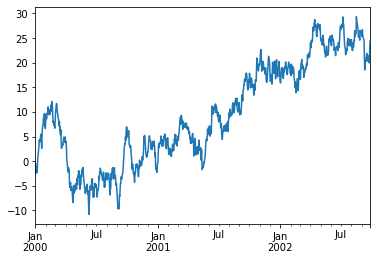

In [133]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

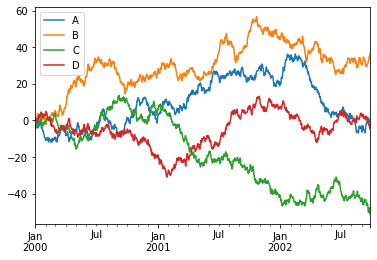

In [134]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

### 데이터 입/출력